가장 높은 성능이 나온 최종 모델입니다. 

In [1]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
import os

# 1.Data Load

In [5]:
#!wget -r -N -c -np https://physionet.org/files/ludb/1.0.0/

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
import re
import wfdb
from wfdb import processing

data_dir = Path('C:/Users/Desktop/3-2/IDL/final_project/dataset')

num_records = 200
records = []


In [3]:
from tqdm.notebook import tqdm

In [6]:
for i in tqdm(range(1,num_records+1)):
  record = wfdb.io.rdrecord(f'{data_dir}/{i}')
  age = 99 if record.comments[0][7:] == '>89' else int(record.comments[0][7:])
  data = {'id': i,
          'age(10)' : age //10 * 10, 
          'sex':record.comments[1][-1],
          'dignosis':record.comments[3:]}
  cols = ['i', 'ii',  'iii',  'avr',  'avl',  'avf',  'v1',  'v2',  'v3',  'v4',  'v5',  'v6']
  for col, j in zip(cols, range(12)):
      ann = wfdb.rdann(f'{data_dir}/{i}', f'atr_{col}')
      data[col] = {'signal':record.p_signal[:, j], 'anno': ann.__dict__['symbol'], 'anno_idx': ann.__dict__['sample']}
  records.append(data)

In [8]:
df=pd.DataFrame(records)

# 2.Preprocessing

2-1. DWT(Discrete Wavelet Transform) 이용해서 신호의 노이즈 제거.


In [10]:
from skimage.restoration import denoise_wavelet
denoised_data = []

for i in range(len(df)):
  data = {
      'id' : i+1
  }

  # 모든 신호에 대해서 denoise wavelet
  for colname in cols:
    data[colname] = denoise_wavelet(df[colname][i]['signal'], method='BayesShrink',
                                mode='soft', wavelet_levels=8, wavelet='db4',
                                rescale_sigma='True')
  denoised_data.append(data)


denoised_signals = pd.DataFrame(denoised_data)
denoised_signals.head()

,id,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6
0,1,"[-119.90064831203651, -42.98888452235324, 34.8...","[24.96133275294272, 97.11975027867946, 194.915...","[144.96063320938558, 140.1212408015322, 159.92...","[47.02106507781347, -27.09104484724255, -114.9...","[-131.8993985424003, -90.97190632975322, -62.0...","[84.96147711250939, 118.14174949753709, 177.91...","[149.95359244940772, 187.1541340593624, 236.88...","[61.91886341921407, 165.24208154940555, 316.83...","[64.92926957109226, 210.20038117298083, 401.84...","[144.92639059053806, 310.152629242335, 501.905...","[104.92360277790587, 234.9927326257242, 387.08...","[-24.8363932770309, 66.9076089355276, 152.1150..."
1,2,"[-162.0311090407124, -140.14318580821413, -191...","[55.048161274534976, 51.91047674834644, 35.089...","[216.91595616176974, 192.1811979662824, 226.96...","[52.99460343390038, 44.066223639392206, 77.939...","[-189.0426954690825, -166.15580845689013, -208...","[135.89703863398407, 122.19038567888818, 130.9...","[92.1409732400953, 106.9244341112607, 107.0672...","[65.13733417147752, 86.9062744830752, 82.08252...","[-31.907423555531963, -12.11194634724055, -21....","[-11.854303046496149, 6.922483743794106, 0.090...","[142.17369392741097, 159.90409312746883, 155.1...","[-1.799893062787706, 6.896407172484739, 5.1287..."
2,3,"[-13.196292165997493, -26.884378386710367, -20...","[-69.91195543703883, -42.158511588886455, -74....","[-56.90877215879811, -15.163640059095933, -54....","[40.90324743516223, 34.20982193029279, 46.9717...","[21.877096098219436, -5.8204928778199285, 16.9...","[-63.89826266348706, -29.16194682962693, -64.9...","[-21.82964297467621, 9.890043885373624, -9.908...","[45.15278751061051, 59.814061701447926, 52.100...","[-89.86717584889905, -80.18277335735694, -81.8...","[-19.890658040670434, -1.9756233818768996, -0....","[-20.101182802430017, -9.851206183100071, 4.87...","[-65.05908929693008, -56.85798850738285, -35.1..."
3,4,"[-99.90481239147844, -48.22663908931325, -92.9...","[340.0812629487586, 406.78758973614515, 377.01...","[439.9667522043796, 455.1857846060954, 469.864...","[-120.08713580730729, -178.79949260538027, -14...","[-269.91059160118294, -251.1750079220973, -280...","[390.0934877171292, 430.80601484750383, 423.03...","[-7.020309532580591, -9.883700537005257, 9.892...","[-357.0307740631268, -356.79074189312445, -340...","[-420.0470585848426, -424.80503514209676, -415...","[-395.07150680443647, -401.8562313429786, -387...","[-165.07652876571626, -174.84992950111325, -16...","[-285.0609536032772, -289.8951522753783, -280...."
4,5,"[92.12628446383064, 129.83362521497065, 105.08...","[52.142547369437345, 64.95561774641003, 60.094...","[-40.13537219404688, -64.74507315932857, -45.0...","[-72.09126231359882, -96.87587035936343, -82.0...","[66.1070470612472, 97.86191999581112, 75.08299...","[5.884695871738978, 0.2459985115122736, 7.9251...","[-17.13795519768861, -31.773409880312084, -20....","[326.88986589219513, 310.2092606028747, 324.92...","[511.9341014257459, 507.1729479309501, 521.888...","[496.8744889541595, 485.2312128860184, 506.885...","[266.89243932606524, 247.22324977196504, 266.9...","[104.85612497721111, 87.25622647077475, 106.86..."


2-2. 노이즈 제거한 신호에 CWT(Continuous Wavelet Transform) 적용

In [13]:
cwt = []

for i in tqdm(range(len(df))):
  data = {'id' : i+1, 
          'LVH' : denoised_signals['LVH'][i]}

  for colname in cols:
    data[colname] = pywt.cwt(denoised_signals[colname][i],np.arange(1,33),wavelet='morl')[0]

  cwt.append(data)

cwt_coef_32 = pd.DataFrame(cwt)
cwt_coef_32.head() #cwt 적용한 데이터 프레임

,id,LVH,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6
0,1,"[1, 0]","[[9.686967235895121, 24.444280990235875, -0.62...","[[9.159390923309633, 9.226241621630006, 1.7745...","[[-0.5389022107438208, -15.244689187658626, 2....","[[-9.371184262402418, -16.78004459162034, -0.6...","[[5.119406723108252, 19.756825203028328, -1.59...","[[4.256581107609934, -2.891735792457263, 2.095...","[[4.783707813286291, -12.167871864104498, -3.3...","[[13.075231433465675, 11.778372313782864, 8.88...","[[18.310668694927312, 16.492440543325117, 10.7...","[[20.76137210353792, 6.631659127671824, 8.3784...","[[16.335088318519006, 6.449260399370541, 7.296...","[[11.455410397431137, 13.907820438654275, 3.34..."
1,2,"[1, 0]","[[2.4307984868753643, 13.66622029538016, 0.077...","[[-0.4893980314241304, -8.764898378359488, 1.9...","[[-2.8856117787263003, -22.43572533014176, 1.8...","[[-0.9177632465825081, -2.4440618044060987, -1...","[[2.60904537882562, 18.055510046888774, -0.880...","[[-1.6595420621222523, -15.620132890780628, 1....","[[1.8122698099012648, -11.279641823649737, -1....","[[2.649963499378819, -8.571859885213042, -2.44...","[[2.3845204294572877, 2.76628989438431, -1.767...","[[2.2691343753075706, 0.673819651223466, -1.49...","[[2.1525807012616625, -18.052235266231385, -2....","[[1.0509484654239287, 0.05480662321308072, -0...."
2,3,"[1, 0]","[[-1.632608766797835, 2.4148229074086807, 0.25...","[[3.272801483799162, 4.554771632878164, -3.324...","[[4.941560358304136, 2.133353618001048, -3.604...","[[-0.7794838456002822, -3.4379008833069222, 1....","[[-3.286989849493533, 0.0730477681656111, 1.92...","[[4.107871556021779, 3.466416736429417, -3.459...","[[3.79862917884803, 0.30621071719923076, -2.64...","[[1.7648558198642474, -6.49582889994694, -1.64...","[[1.185460911760602, 10.856555938817943, -0.79...","[[2.2356124900994967, 2.6174265560991685, -3.5...","[[1.3550795674963196, 4.2012472841686055, -2.9...","[[1.1346498459999372, 10.60086074836341, -2.48..."
3,4,"[1, 0]","[[6.242210649457608, 6.525288125540515, -11.28...","[[8.149873173552749, -45.748427159077416, -14....","[[1.9297796120785904, -52.30822540029342, -3.3...","[[-7.140086894939728, 19.55351462636929, 12.94...","[[2.2182113950131495, 29.40678762797768, -4.04...","[[5.007081089580787, -49.0609644165384, -8.867...","[[-0.2322422599531475, 3.2235857623544297, -1....","[[0.11947696306672384, 45.988704727287875, 0.7...","[[-0.527629670193555, 52.87898451055677, 1.642...","[[-0.7488318598946293, 50.416056816059424, 1.3...","[[-1.117764934969042, 21.828074099123576, 0.10...","[[-0.5315205943739585, 36.264162799771164, 0.6..."
4,5,"[0, 1]","[[4.566061662325904, -14.521924370685403, -7.4...","[[1.5465062042982787, -6.998383340382717, -1.2...","[[-2.9859464092397534, 7.5164114829682855, 6.1...","[[-2.996583629924226, 10.752278074162476, 4.19...","[[3.84597631725147, -11.084219399874527, -6.82...","[[-0.686697963929173, 0.30802393278383094, 2.4...","[[-1.7540680195126273, 3.5810576132218603, 2.2...","[[-2.0104633714483384, -38.36683405546124, 2.0...","[[-0.5402334249066882, -61.16123395358437, -0....","[[-1.3655900643532703, -58.43605550878446, 0.9...","[[-2.37075354816168, -30.337202587164523, 3.62...","[[-2.102830082349721, -10.429677600182163, 3.2..."


2-3. LVH 기준으로 성별 labeling

In [12]:
LVH = [] # if data has LVH 1 , else 0
sex = [] # if data is M 1, else 0
for i in range(len(df)):
  
  if 'Left ventricular hypertrophy.' in df['dignosis'][i]:
    LVH.append(np.asarray([1,0],dtype=np.int32))

  else:
    LVH.append(np.asarray([0,1],dtype=np.int32))

  if df['sex'][i] == 'M':
    sex.append(1)

  else:
    sex.append(0)
    

denoised_signals['LVH'] = LVH
denoised_signals['sex'] = sex

# 3.Model

3.1 CWT를 적용한 여러개의 신호를 동시에 input 하기 위해서 ConvLSTM2D 사용.

다른 리드의 신호를 채널 개념으로 사용해서 inputshape 형성 => (timestep = 10, rows = 32(cwt scale수), columns = 500, channels=2)

성별, 나이 데이터는 따로 인풋해서 접합 - concatenate two models


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, concatenate, TimeDistributed, InputLayer, LSTM, Embedding, Conv3D, MaxPool3D, ConvLSTM2D, Flatten, BatchNormalization, Dropout, MaxPool1D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
import numpy as np

In [139]:
#성별, 나이 input으로 넣는 모델
sex_age_inputs = Input(shape=(2))
sex_age_outputs = Dense(8, activation='relu')(sex_age_inputs)


#signal을 input으로 넣는 모델
signal_inputs = Input(shape=(10,32,500,2))
x = ConvLSTM2D(filters=15,
               kernel_size=(4,50),
               strides=[4,10],
               data_format='channels_last'
               )(signal_inputs)

x = MaxPooling2D(pool_size=(1,5), data_format='channels_last')(x)
x = TimeDistributed(Flatten(data_format='channels_last'))(x)
x = Dropout(0.3)(x)
signal_outputs = LSTM(32, dropout=0.2)(x)



#concatenate 모델
concatenated = concatenate([signal_outputs, sex_age_outputs])
concatenated = Dense(16, activation='relu')(concatenated)
outputs = Dense(2, activation='softmax')(concatenated)

model = Model(inputs=[signal_inputs, sex_age_inputs], outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 10, 32, 500, 0                                            
__________________________________________________________________________________________________
conv_lst_m2d_13 (ConvLSTM2D)    (None, 8, 46, 15)    204060      input_28[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 8, 9, 15)     0           conv_lst_m2d_13[0][0]            
__________________________________________________________________________________________________
time_distributed_12 (TimeDistri (None, 8, 135)       0           max_pooling2d_13[0][0]           
______________________________________________________________________________________

Gubner standard(amplitude of R(i) + amplitude of S(iii) >= 25mm) i,iii 리드 를 인풋으로 사용

In [140]:
# 전처리된 신호들 중 i, iii 리드만 포함 
cols = ['i','iii']

signal_data = np.ndarray(shape=(200, 32, 5000, 2))
sex_age_data = []
x_data= []
y_data = []

for ii in range(200):
   
  for jj in range(2):
        
    signal_data[ii, :, :, jj] = cwt_coef_32[cols[jj]][ii]

  sex_age = []

  sex_age.append(denoised_signals['sex'][ii])
  sex_age.append(df['age(10)'][ii])
  sex_age = np.asarray(sex_age)

  
  
  x_data.append((signal_data[ii], sex_age))
  y_data.append(denoised_signals['LVH'][ii])

In [141]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=777, shuffle=True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=777, shuffle=True)

In [142]:
# Data Augmentation -> duplicate train set for 5 times
x_train = x_train + x_train + x_train + x_train + x_train
y_train = y_train + y_train + y_train + y_train + y_train

In [143]:
#signal input과 sex_age input 따로 생성(train, valid, test 각각에 대해서)
signal_train = []
sex_age_train = []

signal_valid = []
sex_age_valid = []

signal_test = []
sex_age_test = []

for i in range(len(x_train)):
  signal_train.append(x_train[i][0])
  sex_age_train.append(x_train[i][1])

for k in range(len(x_valid)):
  signal_valid.append(x_valid[k][0])
  sex_age_valid.append(x_valid[k][1])
    
    
for k in range(len(x_test)):
  signal_test.append(x_test[k][0])
  sex_age_test.append(x_test[k][1])

In [144]:
#reshape

signal_train = np.reshape(signal_train, (len(signal_train), 10, 32, 500, 2))
signal_valid = np.reshape(signal_valid, (len(signal_valid), 10, 32, 500, 2))
signal_test = np.reshape(signal_test, (len(signal_test), 10, 32, 500, 2))

sex_age_train = np.reshape(sex_age_train, (len(sex_age_train), 2))
sex_age_valid = np.reshape(sex_age_valid, (len(sex_age_valid), 2))
sex_age_test = np.reshape(sex_age_test, (len(sex_age_test), 2))

y_train = np.reshape(y_train, (len(y_train), 2))
y_valid = np.reshape(y_valid, (len(y_valid), 2))
y_test = np.reshape(y_test, (len(y_test), 2))

In [145]:
signal_train.shape, signal_valid.shape, signal_test.shape

((640, 10, 32, 500, 2), (32, 10, 32, 500, 2), (40, 10, 32, 500, 2))

In [146]:
history = model.fit([signal_train,sex_age_train], y_train, 
                    epochs=15, batch_size = 128,
          verbose=1, 
         validation_data = ([signal_valid, sex_age_valid], y_valid), shuffle=True,)

Epoch 1/15
5/5 [==============================] - 91s 18s/step - loss: 2.1734 - accuracy: 0.4906 - val_loss: 2.0391 - val_accuracy: 0.3125
Epoch 2/15
5/5 [==============================] - 89s 18s/step - loss: 1.5712 - accuracy: 0.3656 - val_loss: 1.2964 - val_accuracy: 0.2188
Epoch 3/15
5/5 [==============================] - 87s 17s/step - loss: 1.1076 - accuracy: 0.2547 - val_loss: 0.8198 - val_accuracy: 0.3750
Epoch 4/15
5/5 [==============================] - 89s 18s/step - loss: 0.8701 - accuracy: 0.3812 - val_loss: 0.6635 - val_accuracy: 0.6250
Epoch 5/15
5/5 [==============================] - 86s 17s/step - loss: 0.7972 - accuracy: 0.4797 - val_loss: 0.6237 - val_accuracy: 0.6875
Epoch 6/15
5/5 [==============================] - 87s 17s/step - loss: 0.7444 - accuracy: 0.4969 - val_loss: 0.6071 - val_accuracy: 0.6562
Epoch 7/15
5/5 [==============================] - 87s 17s/step - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.6129 - val_accuracy: 0.6562
Epoch 8/15
5/5 [===========

In [147]:
model.evaluate([signal_test, sex_age_test], y_test, verbose=2)

2/2 - 0s - loss: 0.5317 - accuracy: 0.8750


[0.531711220741272, 0.875]

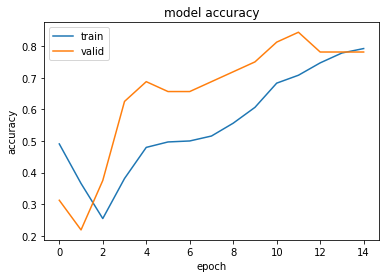

In [148]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.savefig('./model_accuracy.png')
plt.show()

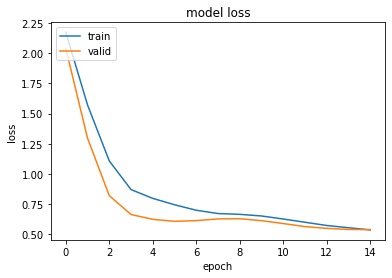

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.savefig('./model_loss.png')
plt.show()

In [198]:
from sklearn.metrics import classification_report
y_pred = model.predict([signal_test, sex_age_test])
y_pred = np.where(y_pred[:,0]>0.5, 1, 0) #if lvh -> 1 / else -> 0
y_test_label = np.where(y_test[:,0]>0.5, 1, 0)
print(classification_report(y_test_label, y_pred), digits=4)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.82      1.00      0.90        23

    accuracy                           0.88        40
   macro avg       0.91      0.85      0.86        40
weighted avg       0.90      0.88      0.87        40



In [199]:
model.save('./model.h5')